In [41]:
import sqlite3
import pandas as pd


db_path = '/Users/neo/Projects/temple/malasim/build/bin/monthly_data_0.db'

conn = sqlite3.connect(db_path)

# Query to sum treatments and treatmentfailures grouped by monthly_data_id
query = '''
select * from main.monthly_site_data_district;
'''

# Creating a cursor object to interact with the database
cur = conn.cursor()
cur.execute(query)
monthly_data = cur.fetchall()

monthly_data_df = pd.DataFrame(monthly_data)
monthly_data_df.columns = [col[0] for col in cur.description]

In [42]:
monthly_data_df.columns

Index(['monthly_data_id', 'unit_id', 'population', 'clinical_episodes',
       'clinical_episodes_by_age_class_0_1',
       'clinical_episodes_by_age_class_1_2',
       'clinical_episodes_by_age_class_2_3',
       'clinical_episodes_by_age_class_3_4',
       'clinical_episodes_by_age_class_4_5',
       'clinical_episodes_by_age_class_5_6',
       ...
       'treatments', 'treatment_failures', 'eir', 'pfpr_under5', 'pfpr_2to10',
       'pfpr_all', 'infected_individuals', 'non_treatment', 'under5_treatment',
       'over5_treatment'],
      dtype='object', length=269)

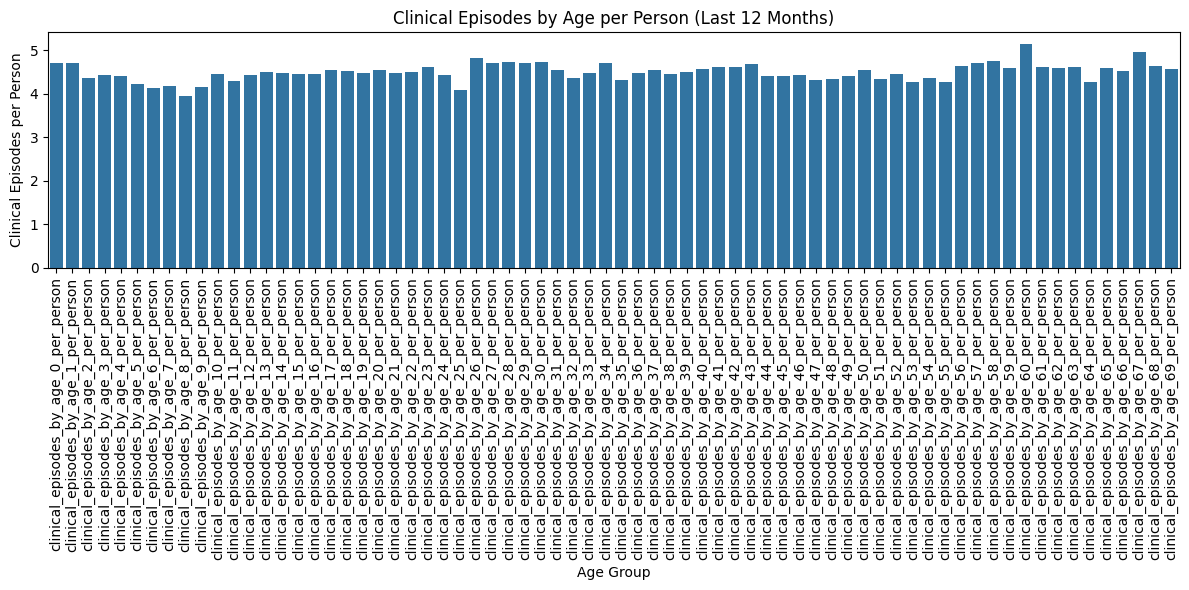

In [43]:
## clinical_episodes_by_age_n / population_by_age_n
for age in range(0,70):
    # clinical episodes by age per person
    p = monthly_data_df[f'clinical_episodes_by_age_{age}'] / monthly_data_df[f'population_by_age_{age}']
    monthly_data_df[f'clinical_episodes_by_age_{age}_per_person'] = p

# extracting the relevant columns
columns_of_interest = [ f'clinical_episodes_by_age_{age}_per_person' for age in range(0,70) ]
clinical_episodes_by_age_df = monthly_data_df[columns_of_interest]
# get last 12 months of data
clinical_episodes_by_age_df = clinical_episodes_by_age_df.tail(12)
# sum to get 1 year
clinical_episodes_by_age_df = clinical_episodes_by_age_df.sum()

# plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=clinical_episodes_by_age_df.index, y=clinical_episodes_by_age_df.values)
plt.title('Clinical Episodes by Age per Person (Last 12 Months)')
plt.xlabel('Age Group')
plt.ylabel('Clinical Episodes per Person')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/f7/6q5ypl9j7j73yzrzp5v8z4zm0000gn/T/ipykernel_50818/1123342642.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  monthly_data_df[f'immune_by_age_{age}_per_person'] = p
/var/folders/f7/6q5ypl9j7j73yzrzp5v8z4zm0000gn/T/ipykernel_50818/1123342642.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  monthly_data_df[f'immune_by_age_{age}_per_person'] = p
/var/folders/f7/6q5ypl9j7j73yzrzp5v8z4zm0000gn/T/ipykernel_50818/1123342642.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

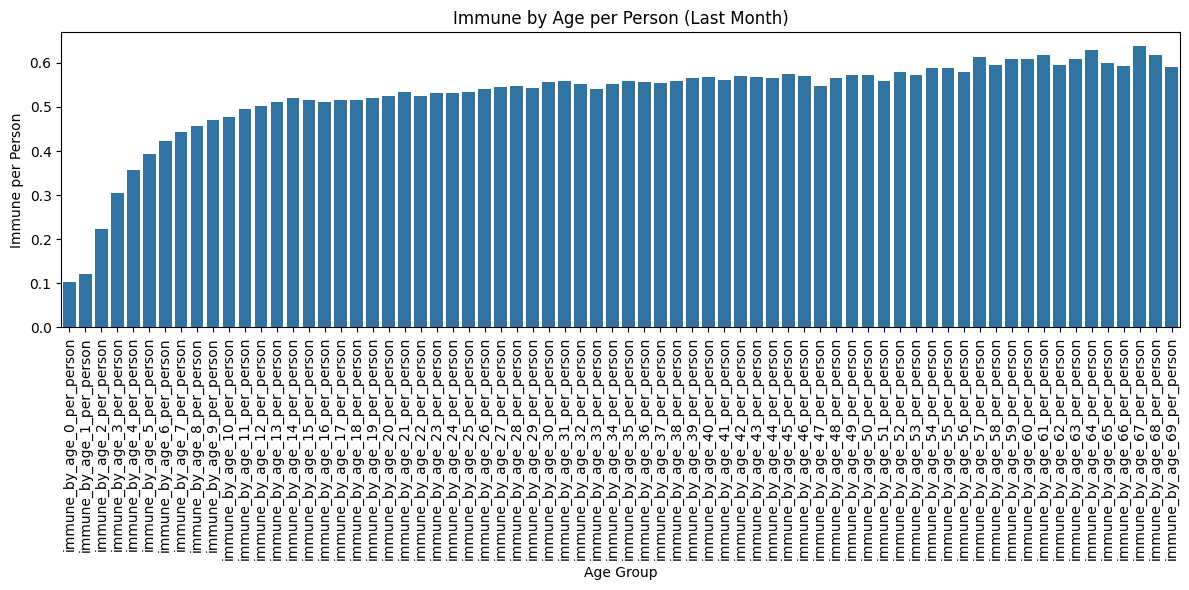

In [44]:
## clinical_episodes_by_age_n / population_by_age_n
for age in range(0,70):
    # clinical episodes by age per person
    p = monthly_data_df[f'total_immune_by_age_{age}'] / monthly_data_df[f'population_by_age_{age}']
    monthly_data_df[f'immune_by_age_{age}_per_person'] = p

# extracting the relevant columns
columns_of_interest = [ f'immune_by_age_{age}_per_person' for age in range(0,70) ]
immune_by_age_df = monthly_data_df[columns_of_interest]
# get the very last month of data
immune_by_age_df = immune_by_age_df.tail(1)

plt.figure(figsize=(12, 6))
sns.barplot(x=immune_by_age_df.columns, y=immune_by_age_df.values.flatten())
plt.title('Immune by Age per Person (Last Month)')
plt.xlabel('Age Group')
plt.ylabel('Immune per Person')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

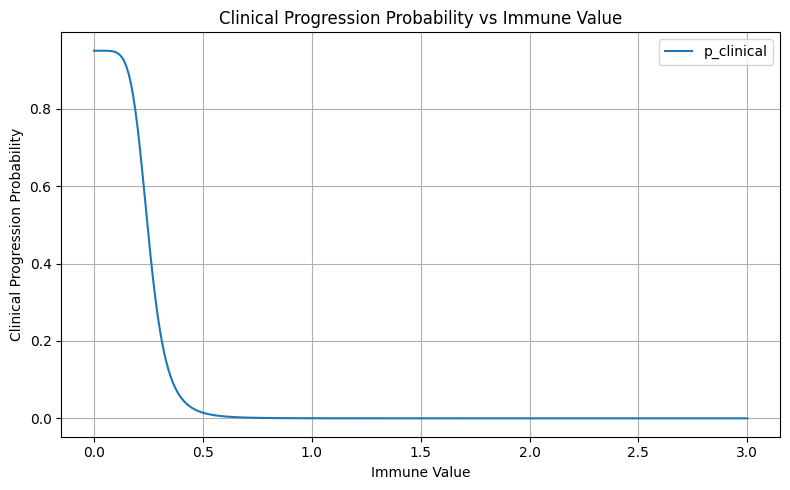

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Constants from the code and assumed based on typical sigmoid function
MID_POINT = 0.25 # This can be adjusted as per actual implementation
isf_max_clinical_probability = 0.95
isf_immune_effect_on_progression_to_clinical = 6

# Define the function
def p_clinical(immune):
    return isf_max_clinical_probability / (
        1 + np.power((immune / MID_POINT), isf_immune_effect_on_progression_to_clinical)
    )

# Generate a range of immune values
immune_values = np.linspace(0, 3, 300)
p_clinical_values = p_clinical(immune_values)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(immune_values, p_clinical_values, label='p_clinical')
plt.title('Clinical Progression Probability vs Immune Value')
plt.xlabel('Immune Value')
plt.ylabel('Clinical Progression Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
